In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [19]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [20]:
# reflect an existing database into a new model
Base = automap_base()


# reflect the tablesv
Base.prepare(autoload_with=engine)



In [21]:
# View all of the classes that automap found
for table_name, class_obj in Base.classes.items():
    print(f'Class for table {table_name}: {class_obj}')


Class for table measurement: <class 'sqlalchemy.ext.automap.measurement'>
Class for table station: <class 'sqlalchemy.ext.automap.station'>


In [22]:
Base.classes.items()

[('measurement', sqlalchemy.ext.automap.measurement),
 ('station', sqlalchemy.ext.automap.station)]

In [23]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [24]:
# Create our session (link) from Python to the DB
session = Session(engine)



# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
session.query(func.max(measurement.date)).all()

('2017-08-23',)

In [30]:
session.query(func.max(measurement.date)).all()

[('2017-08-23',)]

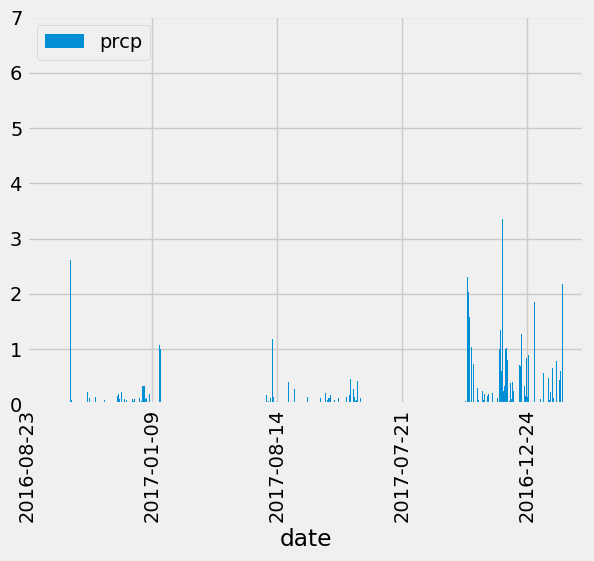

In [69]:
# Calculate the date one year from the last date in data set.
yearb4 = '2016-08-23'
yearduring = session.query(func.max(measurement.date)).all()
# Perform a query to retrieve the data and precipitation scores
results = session.query(measurement).filter(measurement.date >= yearb4)
df = pd.read_sql(results.statement, engine)
df.head()
df.plot(kind = 'bar', x = 'date', y = 'prcp')
from matplotlib.ticker import MaxNLocator
max_xticks = 4
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True, nbins=max_xticks + 1))


In [61]:
df.head()


,id,station,date,prcp,tobs
0,2333,USC00519397,2016-07-23,0.00,78.0
1,2334,USC00519397,2016-07-24,0.13,79.0
2,2335,USC00519397,2016-07-25,4.20,78.0
3,2336,USC00519397,2016-07-26,0.00,80.0
4,2337,USC00519397,2016-07-27,0.00,80.0


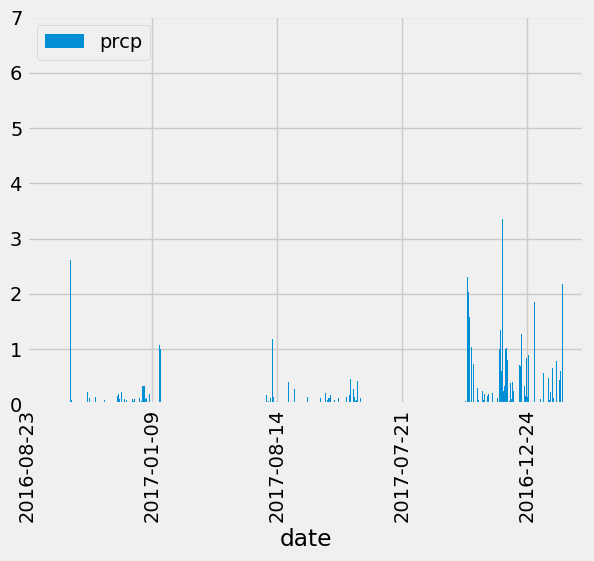

In [109]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.

# Perform a query to retrieve the data and precipitation scores


# Save the query results as a Pandas DataFrame. Explicitly set the column names


# Sort the dataframe by date


# Use Pandas Plotting with Matplotlib to plot the data
yearb4 = '2016-08-23'
yearduring = session.query(func.max(measurement.date)).all()
results = session.query(measurement).filter(measurement.date >= yearb4)
df = pd.read_sql(results.statement, engine)
df.head()
df.plot(kind = 'bar', x = 'date', y = 'prcp')
from matplotlib.ticker import MaxNLocator
max_xticks = 4
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True, nbins=max_xticks + 1))

In [70]:
df['prcp'].describe()

count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: prcp, dtype: float64

In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data


,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [72]:
# Design a query to calculate the total number of stations in the dataset
session.query(station).count()

9

In [93]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
from sqlalchemy import desc

active_stations = session.query(measurement.station,
                    func.count(measurement.station)).group_by(measurement.station).order_by(desc(func.count(measurement.station)))

list(active_stations)


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [108]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
results = session.query(func.avg(measurement.tobs)).filter(measurement.station == "USC00519281").all()
results2 = session.query(func.max(measurement.tobs)).filter(measurement.station == "USC00519281").all()
results3 = session.query(func.min(measurement.tobs)).filter(measurement.station == "USC00519281").all()
print(results)
print(results2)
print(results3)

[(71.66378066378067,)]
[(85.0,)]
[(54.0,)]


(array([ 5.,  7.,  7., 12., 27., 41., 40., 57., 66., 53., 29.,  8.]),
 array([59., 61., 63., 65., 67., 69., 71., 73., 75., 77., 79., 81., 83.]),
 <BarContainer object of 12 artists>)

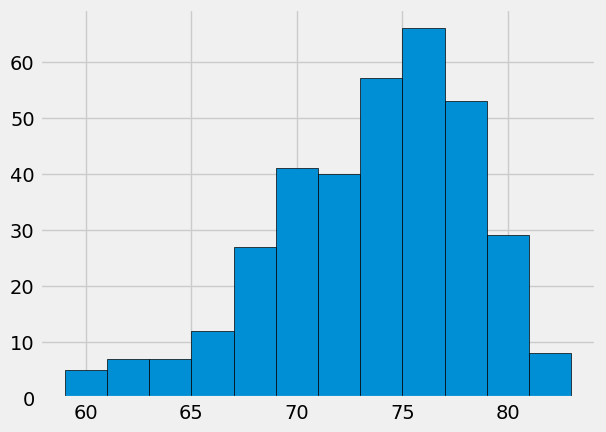

In [113]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
yearb4 = '2016-08-23'
from sqlalchemy import and_, or_

results = session.query(measurement).filter(and_(measurement.date >= yearb4,measurement.station == "USC00519281" ))
df = pd.read_sql(results.statement, engine)
df.head()
plt.hist(df['tobs'], bins=12, edgecolor='black')


# Close Session

In [16]:
# Close Session
session.close()